In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'Birds_Species_dataset/train'
data_test_path = 'Birds_Species_dataset/test'
data_val_path = 'Birds_Species_dataset/valid'

In [3]:
img_width =224
img_height =224

In [4]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 84635 files belonging to 525 classes.


In [5]:
data_cat = data_train.class_names
data_cat

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'AMERICAN ROBIN',
 'AMERICAN WIGEON',
 'AMETHYST WOODSTAR',
 'ANDEAN GOOSE',
 'ANDEAN LAPWING',
 'ANDEAN SISKIN',
 'ANHINGA',
 'ANIANIAU',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ANTILLEAN EUPHONIA',
 'APAPANE',
 'APOSTLEBIRD',
 'ARARIPE MANAKIN',
 'ASHY STORM PETREL',
 'ASHY THRUSHBIRD',
 'ASIAN CRESTED IBIS',
 'ASIAN DOLLARD BIRD',
 'ASIAN GREEN BEE EATER',
 'ASIAN OPENBILL STORK',
 'AUCKLAND SHAQ',
 'AUSTRAL CANASTERO',
 'AUSTRALASIAN FIGBIRD',
 'AVADAVAT',
 'AZARAS SPINETAIL',
 'AZURE 

In [6]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 2625 files belonging to 525 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 2625 files belonging to 525 classes.


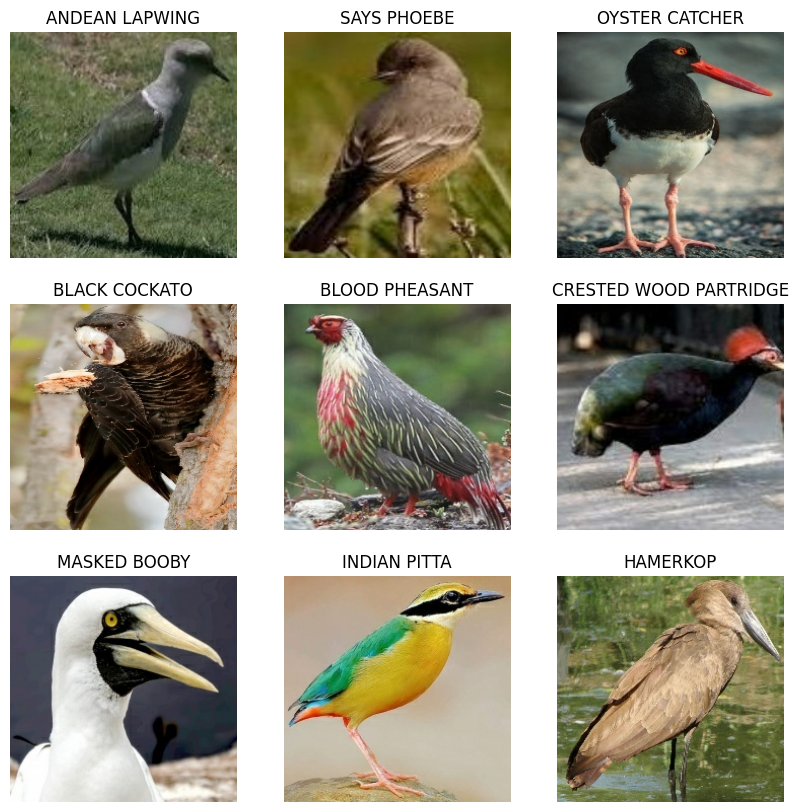

In [8]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
epochs_size= 15
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 800s 302ms/step - accuracy: 0.1259 - loss: 4.9086 - val_accuracy: 0.4987 - val_loss: 2.3488
Epoch 2/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 891s 337ms/step - accuracy: 0.4980 - loss: 2.3140 - val_accuracy: 0.5589 - val_loss: 2.1069
Epoch 3/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 825s 312ms/step - accuracy: 0.6823 - loss: 1.3470 - val_accuracy: 0.5230 - val_loss: 2.5376
Epoch 4/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 839s 317ms/step - accuracy: 0.8215 - loss: 0.6839 - val_accuracy: 0.4998 - val_loss: 3.1825
Epoch 5/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 804s 304ms/step - accuracy: 0.8846 - loss: 0.4120 - val_accuracy: 0.5139 - val_loss: 3.4672
Epoch 6/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 775s 293ms/step - accuracy: 0.9127 - loss: 0.3100 - val_accuracy: 0.5112 - val_loss: 3.9204
Epoch 7/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 769s 291ms/step - accuracy: 0.9272 - loss: 0.2555 - val_accuracy: 0.5078 - val_loss: 3.9957
Epoch 8/15
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 678s 256ms/step - ac

Text(0.5, 1.0, 'Loss')

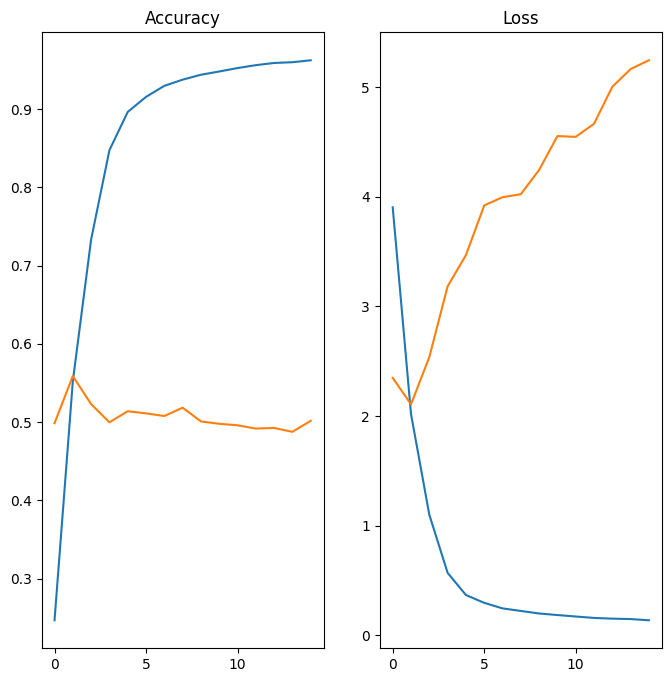

In [14]:
epochs_range= range (epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [16]:
image = 'Birds_Species_dataset\Others\Crow.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [17]:
predict =model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [18]:
score = tf.nn.softmax(predict)

In [21]:
print('Bird Species in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Bird Species in image is CROW with accuracy of 100.00


In [20]:
model.save('Image_classify_Birds_Model.keras')